# Example: CR3BP Equations of Motion & Jacobi Constant

## Solve the Equations of Motion for the CR3BP

Recall that we developed three nondimensional scalar equations of motion for the CR3BP:

$$\begin{aligned}\ddot{x}^* - 2\dot{y}^* - x^* &= -\frac{1 - \pi_2}{\sigma^3}\left(x^* + \pi_2\right) - \frac{\pi_2}{\psi^3}\left(x^* - 1 + \pi_2\right) \\ \ddot{y}^* + 2\dot{x}^* - y^* &= -\frac{1 - \pi_2}{\sigma^3} y^* - \frac{\pi_2}{\psi^3}y^* \\ \ddot{z}^* &= -\frac{1 - \pi_2}{\sigma^3}z^* - \frac{\pi_2}{\psi^3}z^*\end{aligned}$$

To put this into a form that we can solve, we need to solve for the acceleration components:

$$\begin{aligned}\ddot{x}^* &= 2\dot{y}^* + x^*  -\frac{1 - \pi_2}{\sigma^3}\left(x^* + \pi_2\right) - \frac{\pi_2}{\psi^3}\left(x^* - 1 + \pi_2\right) \\ \ddot{y}^* &= - 2\dot{x}^* + y^* -\frac{1 - \pi_2}{\sigma^3} y^* - \frac{\pi_2}{\psi^3}y^* \\ \ddot{z}^* &= -\frac{1 - \pi_2}{\sigma^3}z^* - \frac{\pi_2}{\psi^3}z^*\end{aligned}$$

Now, the state vector is the initial position and velocity of the tertiary mass in the system. We need to provide $\pi_2$, the mass ratio, as the parameter of the system. Remember that:

$$\pi_2 = \frac{m_2}{m_1 + m_2}$$

and

$$\sigma = \sqrt{\left(x^* + \pi_2\right)^2 + y^2 + z^2}$$

and

$$\psi = \sqrt{\left(x^* - 1 + \pi_2\right)^2 + y^2 + z^2}$$

Let's solve this system of equations numerically to find the position of $m$ as a function of (nondimensional) time in the rotating frame of reference.

In [1]:
# %matplotlib notebook
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath

In [2]:
# This code defines a nice shape for the center of mass of the system.
circle = mpath.Path.unit_circle()
wedge_1 = mpath.Path.wedge(90, 180)
wedge_2 = mpath.Path.wedge(270, 0)

verts = np.concatenate([circle.vertices, wedge_1.vertices[::-1, ...], wedge_2.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, wedge_1.codes, wedge_2.codes])
center_of_mass = mpath.Path(verts, codes)

In [3]:
# These masses represent the Earth-Moon system
m_1 = 5.974E24  # kg
m_2 = 7.348E22 # kg
pi_2 = m_2/(m_1 + m_2)

# Define the initial position and velocity components
x_0 = 1 - pi_2
y_0 = .0455
z_0 = 0
vx_0 = -0.5
vy_0 = 0.5
vz_0 = 0
# Then stack everything together into the state vector
r_0 = np.array((x_0, y_0, z_0))
v_0 = np.array((vx_0, vy_0, vz_0))
Y_0 = np.hstack((r_0, v_0))

In [4]:
def nondim_cr3bp(t, Y):
    """Solve the CR3BP in nondimensional coordinates.
    
    The state vector is Y, with the first three components as the
    position of $m$, and the second three components its velocity.
    
    The solution is parameterized on $\\pi_2$, the mass ratio.
    """
    # Get the position and velocity from the solution vector
    x, y, z = Y[:3]
    xdot, ydot, zdot = Y[3:]
    
    # Define the derivative vector
    Ydot = np.zeros(len(Y))
    Ydot[:3] = Y[3:]

    sigma = np.sqrt(((x + pi_2)**2) + (y**2) + (z**2))
    psi = np.sqrt(((x - 1 + pi_2)**2) + (y**2) + (z**2))
    Ydot[3] = 2 * ydot + x - (1 - pi_2)*(x + pi_2)/sigma**3 - pi_2*(x - 1 + pi_2)/psi**3
    Ydot[4] = -2 * xdot + y - (1 - pi_2)*y/sigma**3 - pi_2*y/psi**3
    Ydot[5] = -(1 - pi_2)/sigma**3 * z - pi_2/psi**3 * z
    return Ydot

In [5]:
t_0 = 0  # nondimensional time
t_f = 20  # nondimensional time
t_points = np.linspace(t_0, t_f, 1000)
sol = solve_ivp(nondim_cr3bp, [t_0, t_f], Y_0, t_eval=t_points)

Y = sol.y.T
r = Y[:, :3]  # nondimensional distance
v = Y[:, 3:]  # nondimensional velocity

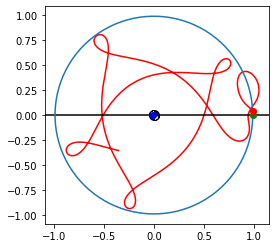

In [6]:
x_2 = (1 - pi_2) * np.cos(np.linspace(0, np.pi, 100))
y_2 = (1 - pi_2) * np.sin(np.linspace(0, np.pi, 100))
x_1 = (-pi_2) * np.cos(np.linspace(0, np.pi, 100))
y_1 = (-pi_2) * np.sin(np.linspace(0, np.pi, 100))
fig, ax = plt.subplots()

# Plot the orbits
ax.plot(r[:, 0], r[:, 1], 'r', label="Orbit")
ax.axhline(0, color='k')
ax.plot(np.hstack((x_2, x_2[::-1])), np.hstack((y_2, -y_2[::-1])))
ax.plot(np.hstack((x_1, x_1[::-1])), np.hstack((y_1, -y_1[::-1])))
ax.plot(0, 0, 'k', marker=center_of_mass, markersize=10)
ax.plot(-pi_2, 0, 'bo', label="$m_1$")
ax.plot(1 - pi_2, 0, 'go', label="$m_2$")
ax.plot(x_0, y_0, 'ro')
ax.set_aspect("equal")

In the co-rotating reference frame, we can get some very interesting behavior of $m$. The behavior of $m$ depends very strongly on the initial conditions that we set.

**See what interesting patterns you can get, and post your efforts on Piazza!**